*Data Evaluation*

In [56]:
!python -m pip install pandas
!python -m pip install matplotlib
!python -m pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_file_path = "LearningData/100Eps_Expert_rules_LearningData_2023-12-17_22-38.csv"
df = pd.read_csv(csv_file_path)
df.head()

,Strategy 1,Strategy 2,Strategy 3,Strategy 4,Strategy 5,Strategy 6,Strategy 7,Action,Number of Alerts,Sum of alert weights,Reward,Done,Timestamp
0,False,False,False,False,False,False,False,0,7,22,-88,False,2023-12-17 22:39:25.848619
1,False,False,True,False,False,False,False,3,5,18,-73,False,2023-12-17 22:39:40.889535
2,False,False,True,True,False,False,False,4,4,16,-66,False,2023-12-17 22:39:55.932088
3,False,False,False,True,False,False,False,3,6,20,-81,False,2023-12-17 22:40:10.985482
4,False,False,False,False,False,False,False,4,7,22,-88,False,2023-12-17 22:40:26.030045


In [3]:
df['Episode'] = 1

current_episode = 1
for index, row in df.iterrows():
    if row['Done']:
        current_episode += 1
    df.at[index, 'Episode'] = current_episode

In [4]:
summary_df = df.groupby('Episode')['Number of Alerts'].sum().reset_index()
summary_df.columns = ['Episode', 'Number of Actions']

summary_df.head()

,Episode,Number of Actions
0,1,174
1,2,36
2,3,89
3,4,47
4,5,125


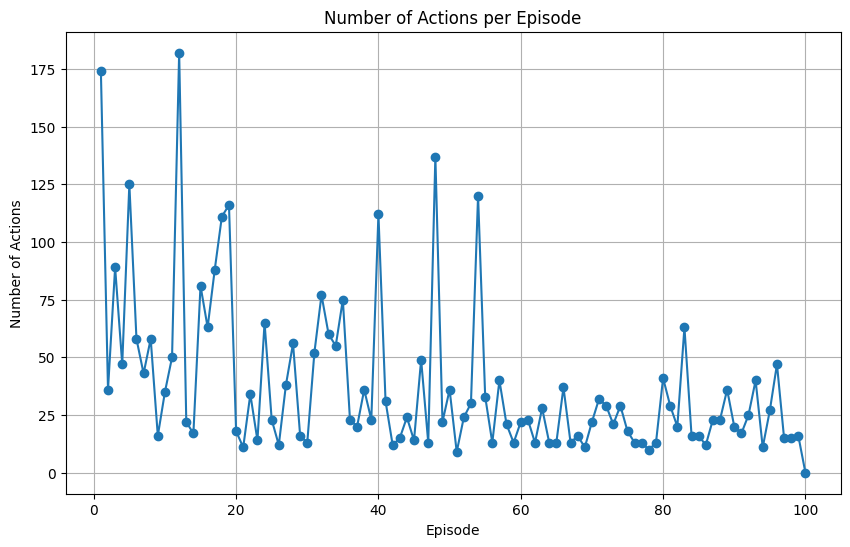

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Episode'], summary_df['Number of Actions'], marker='o', linestyle='-')
plt.title('Number of Actions per Episode')
plt.xlabel('Episode')
plt.ylabel('Number of Actions')
plt.grid(True)
plt.show()

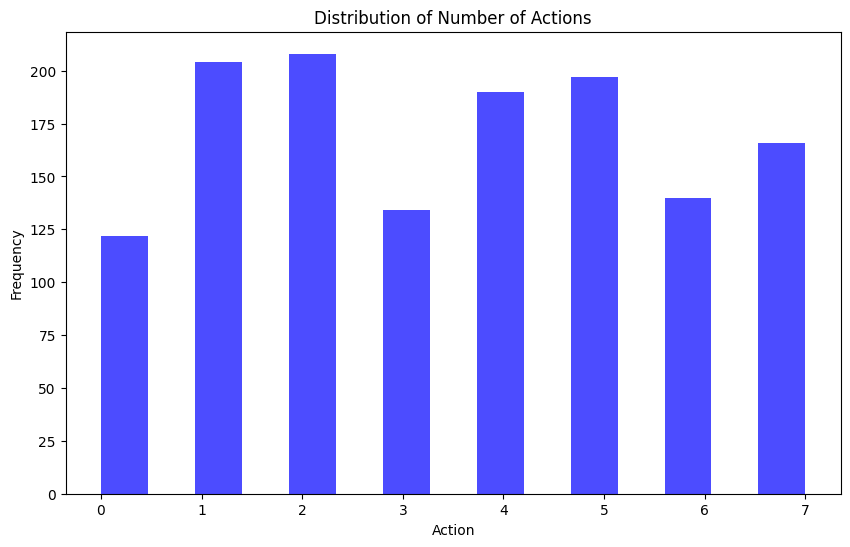

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Action'], bins=15, color='blue', alpha=0.7)
plt.title('Distribution of Number of Actions')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.show()

In [22]:
df['Episode Group'] = (df['Episode'] // 10) * 10

episode_group_actions_df = pd.crosstab(df['Episode Group'], df['Action'])

print(episode_group_actions_df)

Action          0   1   2   3   4   5   6   7
Episode Group                                
0              23  41  24  28  29  34  27  27
10             30  37  37  29  40  32  26  36
20              8  15  26  11  20   9  10  14
30             17  24  31  16  18  18  14  18
40             20  15  24  21  14  16  17  20
50             10  22  18   8  14  22  16  12
60              4  10  12   4  10  15  10   9
70              2  10  12   2  14  18   6  10
80              7  14  14   9  19  13   7  12
90              1  16   9   6  12  20   7   8
100             0   0   1   0   0   0   0   0


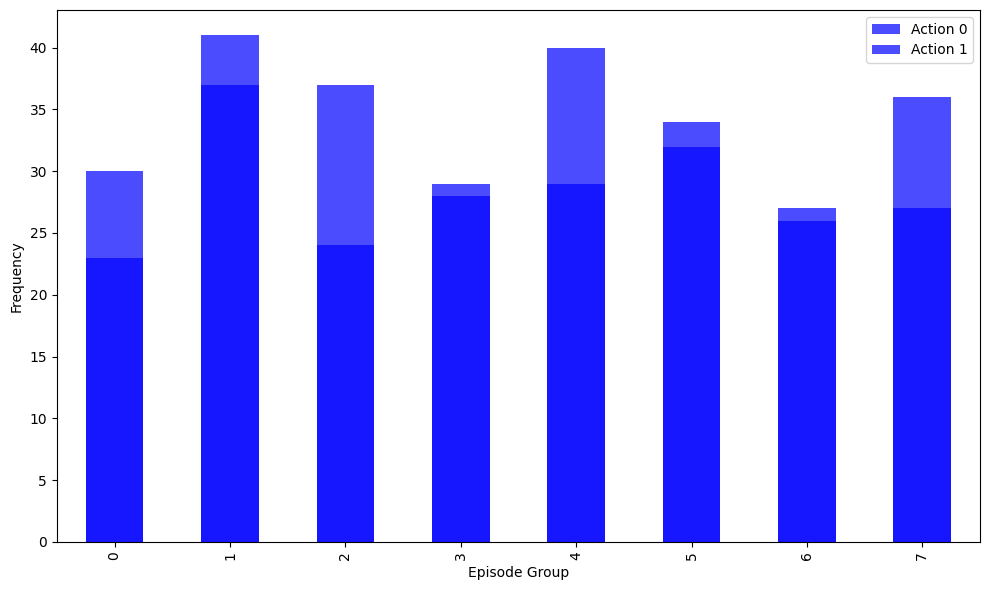

In [9]:
first_two_episode_groups = episode_group_actions_df.index[:2]
plt.figure(figsize=(10, 6))


for i, episode_group in enumerate(first_two_episode_groups):
    episode_group_actions_df.loc[episode_group].plot(kind='bar', color='blue', alpha=0.7)

plt.legend(['Action 0', 'Action 1', 'Action 2', 'Action 3', 'Action 4', 'Action 5', 'Action 6', 'Action 7'])
plt.xlabel('Episode Group')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

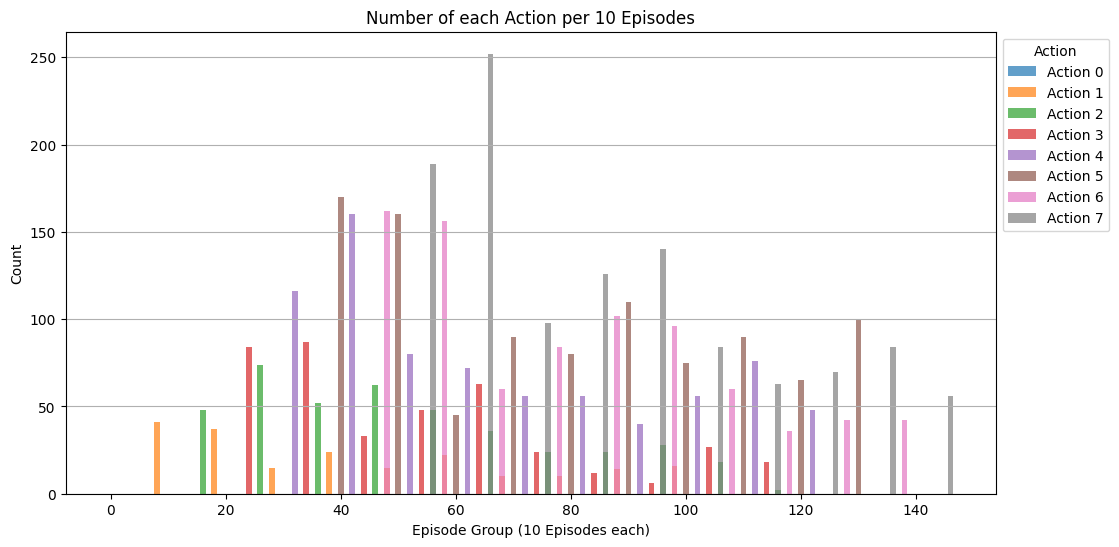

In [20]:
df['Episode Group'] = (df['Episode'] // 10) * 10

# Create a new DataFrame with Episode Group and Action columns
grouped_df = df.groupby(['Episode Group', 'Action'])['Action'].sum().unstack().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 1

for i, col in enumerate(grouped_df.columns[1:]):
    x = grouped_df['Episode Group'] + i * bar_width * (len(grouped_df.columns)-1)
    plt.bar(x, grouped_df[col], width=bar_width, label=f'Action {col}', alpha=0.7)

plt.title('Number of each Action per 10 Episodes')
plt.xlabel('Episode Group (10 Episodes each)')
plt.ylabel('Count')
plt.legend(title='Action', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

In [21]:
grouped_df

Action,Episode Group,0,1,2,3,4,5,6,7
0,0,0.0,41.0,48.0,84.0,116.0,170.0,162.0,189.0
1,10,0.0,37.0,74.0,87.0,160.0,160.0,156.0,252.0
2,20,0.0,15.0,52.0,33.0,80.0,45.0,60.0,98.0
3,30,0.0,24.0,62.0,48.0,72.0,90.0,84.0,126.0
4,40,0.0,15.0,48.0,63.0,56.0,80.0,102.0,140.0
5,50,0.0,22.0,36.0,24.0,56.0,110.0,96.0,84.0
6,60,0.0,10.0,24.0,12.0,40.0,75.0,60.0,63.0
7,70,0.0,10.0,24.0,6.0,56.0,90.0,36.0,70.0
8,80,0.0,14.0,28.0,27.0,76.0,65.0,42.0,84.0
9,90,0.0,16.0,18.0,18.0,48.0,100.0,42.0,56.0
